In [119]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from math import comb

In [90]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)
    
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
    
setattr(Axes3D, 'arrow3D', _arrow3D)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlim(0,2)
# ax.arrow3D(0.2,0,0,
#            1.2,1,1,
#            mutation_scale=20,
#            arrowstyle="-|>",
#            linestyle='dashed')
# ax.arrow3D(1,0,0,
#            1,1,1,
#            mutation_scale=20,
#            ec ='green',
#            fc='red')
# ax.set_title('3D Arrows Demo')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# fig.tight_layout()

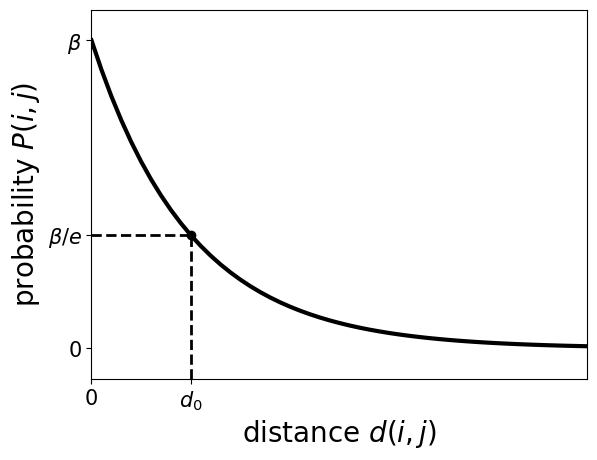

In [91]:
wax = lambda beta, d, d0: beta*np.exp(-d/d0)

beta = 1
d0 = 1
dvec = np.arange(0,5.1,0.1)
pvec = wax(beta, dvec, d0)

fig,ax = plt.subplots()
ax.plot(dvec,pvec,color='black',linewidth=3)
ax.set_ylim([-0.1,1.1])
ax.set_xlim([dvec[0],dvec[-1]])
ax.set_xlabel(r'distance $d(i,j)$',fontsize=20)
ax.set_ylabel(r'probability $P(i,j)$',fontsize=20)
ax.set_yticks([0,wax(beta, d0, d0),beta])
ax.set_yticklabels(['0',r'$\beta/e$',r'$\beta$'])
ax.tick_params(axis='y',labelsize=15)
ax.set_xticks([0,d0])
ax.set_xticklabels(['0',r'$d_0$'])
ax.tick_params(axis='x',labelsize=15)
ax.scatter(d0, wax(beta, d0, d0), color='black')
ax.vlines(d0, -0.1, wax(beta, d0, d0), linestyle='--', color='black', linewidth=2)
ax.hlines(wax(beta, d0, d0), 0, d0, linestyle='--', color='black', linewidth=2)
plt.savefig('waxmanprob.png',bbox_inches='tight',dpi=200)
plt.show()
# plt.yticks(['0',r'$\beta$'],[0,beta])

In [92]:
def getDists2D(pos, refidx):
    pos_ref = pos[refidx,:]
    pos_others = np.delete(pos, refidx, axis=0)
    x_ref = pos_ref[0]
    y_ref = pos_ref[1]
    x_others = pos_others[:,0]
    y_others = pos_others[:,1]
    dists = (x_ref - x_others)**2 + (y_ref - y_others)**2
    dists = np.sqrt(dists)
    return dists

In [93]:
N = 5
pos = np.random.randn(N,2) # random positions of nodes in 2D space
refidx = 3
dists = getDists2D(pos, refidx)
print(dists)
beta = 0.5
d0 = 0.5
probs = wax(beta, dvec, d0)
print(probs)
conns = np.array(probs>0, dtype=int)
print(conns)

[2.98353473 0.86747659 1.30852671 2.52696963]
[5.00000000e-01 4.09365377e-01 3.35160023e-01 2.74405818e-01
 2.24664482e-01 1.83939721e-01 1.50597106e-01 1.23298482e-01
 1.00948259e-01 8.26494441e-02 6.76676416e-02 5.54015792e-02
 4.53589766e-02 3.71367891e-02 3.04050313e-02 2.48935342e-02
 2.03811020e-02 1.66866350e-02 1.36618612e-02 1.11853859e-02
 9.15781944e-03 7.49778841e-03 6.13866995e-03 5.02591787e-03
 4.11487352e-03 3.36897350e-03 2.75828221e-03 2.25829047e-03
 1.84893186e-03 1.51377737e-03 1.23937609e-03 1.01471532e-03
 8.30778637e-04 6.80184019e-04 5.56887574e-04 4.55940983e-04
 3.73292904e-04 3.05626381e-04 2.50225717e-04 2.04867489e-04
 1.67731314e-04 1.37326785e-04 1.12433662e-04 9.20528968e-05
 7.53665375e-05 6.17049020e-05 5.05197009e-05 4.13620328e-05
 3.38643682e-05 2.77257997e-05 2.26999649e-05]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


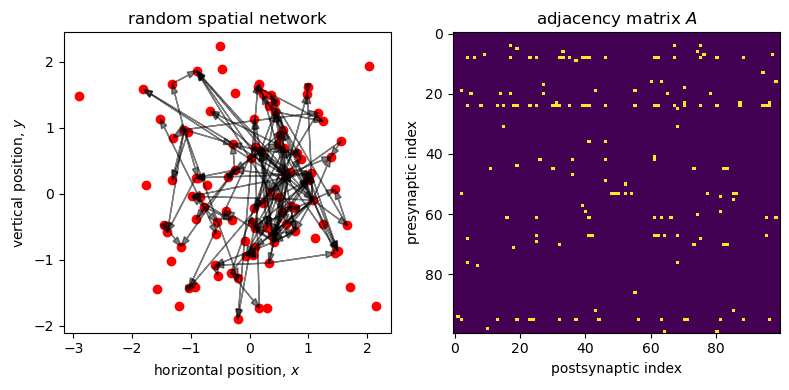

In [94]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
N = 100
pos = np.random.randn(N,2) # random positions of nodes in 2D space
xpos = pos[:,0]
ypos = pos[:,1]
ax[0].scatter(xpos, ypos, color = 'red')

beta = 1.
d0 = 0.2

A = np.zeros((N,N))

for refidx in range(N):
    dists = getDists2D(pos, refidx)
    probs = wax(beta, dists, d0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xedge = [xpos[refidx],xpos[post_idx]]
        yedge = [ypos[refidx],ypos[post_idx]]
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        
        # print(xedge)
        # ax[0].plot(xedge, yedge,color='red')
        ax[0].arrow(xpre, ypre, dx, dy, head_width=0.1, fc='black',alpha = 0.5, length_includes_head=True)
    # print(A)
    # pre_id = i
    # post_id = i+1
    # A[pre_id,post_id] = 1
    # xedge = [xpos[pre_id],xpos[post_id]]
    # yedge = [ypos[pre_id],ypos[post_id]]
    # ax[0].plot(xedge, yedge,color='red')

ax[0].set_title('random spatial network')
# ax[0].scatter(xpos, ypos)
# ax[0].set_xlim([-3,3])
# ax[0].set_ylim([-3,3])
ax[0].set_xlabel(r'horizontal position, $x$')
ax[0].set_ylabel(r'vertical position, $y$')
ax[1].imshow(A,aspect="auto")
ax[1].set_xlabel('postsynaptic index')
ax[1].set_ylabel('presynaptic index')
ax[1].set_title(r'adjacency matrix $A$')
plt.tight_layout()
plt.savefig('2D_spatial_net_wax.png',bbox_inches='tight',dpi=200)
plt.show()

In [95]:
def getDists3D(pos, refidx):
    pos_ref = pos[refidx,:]
    pos_others = np.delete(pos, refidx, axis=0)
    x_ref = pos_ref[0]
    y_ref = pos_ref[1]
    z_ref = pos_ref[2]
    x_others = pos_others[:,0]
    y_others = pos_others[:,1]
    z_others = pos_others[:,2]
    dists = (x_ref - x_others)**2 + (y_ref - y_others)**2 + (z_ref - z_others)**2
    dists = np.sqrt(dists)
    return dists

In [96]:
import numpy as np

In [97]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the `~numpy.random.Generator.uniform`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high

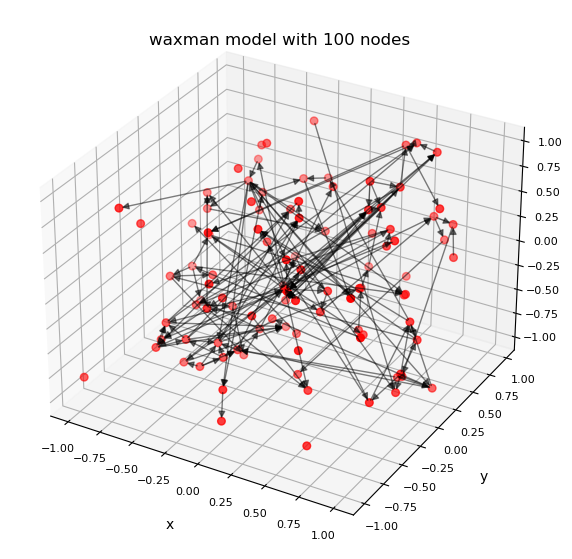

In [98]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

N = 100
# pos = np.random.randn(N,3) # random positions of nodes in 3D space
pos = np.random.uniform(-1,1,size=(N,3)) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)
beta = 10.
d0 = 0.1
Asquare = np.zeros((N,N))
for refidx in range(N):
    dists = getDists3D(pos, refidx)
    probs = wax(beta, dists, d0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        Asquare[refidx,post_idx] = 1
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        zpre = zpos[refidx]
        zpost= zpos[post_idx]
        dz = zpost - zpre
        ax.arrow3D(xpre, ypre, zpre,
                   dx  , dy  , dz  ,
                   mutation_scale=10,
                   arrowstyle="-|>",
                   ec='black',
                   fc='black',
                   alpha=0.5)
# ax.dist = 13
plt.rcParams['axes.titley'] = 1.
ax.set_title(f'waxman model with {N} nodes')
ax.set_xlabel(r'x',labelpad=10)
ax.tick_params(axis='x',labelsize=8)
ax.set_ylabel(r'y',labelpad=10)
ax.tick_params(axis='y',labelsize=8)
ax.set_zlabel(r'z',labelpad=10)
ax.tick_params(axis='z',labelsize=8)
plt.savefig('3d_spatialNet_wax_uniformPositions.png',bbox_inches='tight',dpi=200)
plt.show()
# ax.scatter(xpos, ypos, zpos, s=50, color='red')

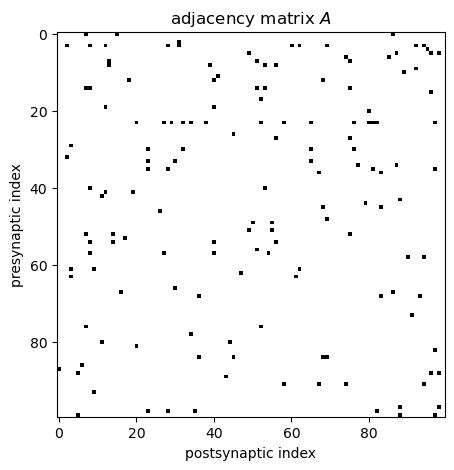

In [99]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(Asquare,aspect="auto",cmap='Greys')
plt.rcParams['axes.titley'] = 1
ax.set_ylabel('presynaptic index')
ax.set_xlabel('postsynaptic index')
ax.set_title(r'adjacency matrix $A$')
plt.savefig('A_3d_spatial_wax.png',bbox_inches='tight',dpi=200)
plt.show()

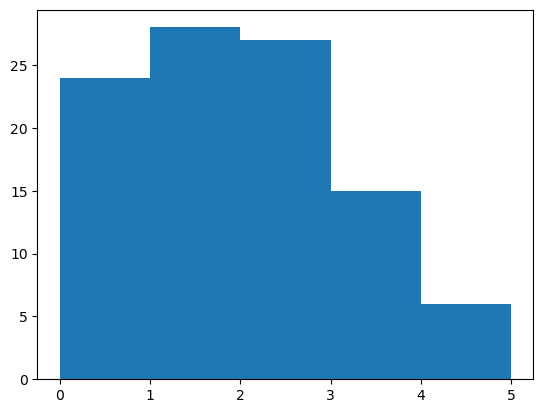

In [100]:
dout = np.sum(Asquare,axis=0)
binvec = np.arange(min(dout),max(dout)+1,1)
plt.hist(dout,bins=binvec)
plt.show()

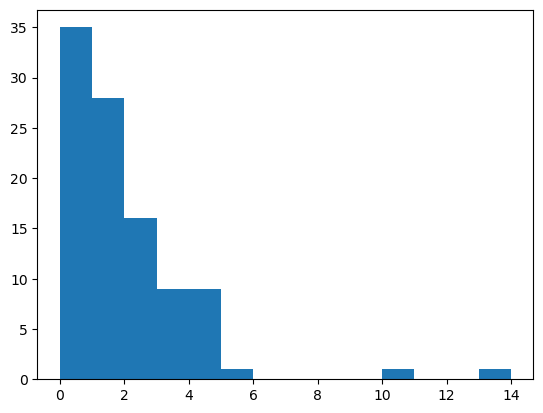

In [101]:
din = np.sum(Asquare,axis=1)
binvec = np.arange(min(din),max(din)+1,1)
plt.hist(din,bins=binvec)
plt.show()

In [102]:
con_motif = Motif("""
A -> C
B -> C
""")

div_motif = Motif("""
A -> B
A -> C
""")

chain_motif = Motif("""
A -> B
B -> C
""")

hostA = nx.from_numpy_array(A, create_using=nx.DiGraph)
executor = GrandIsoExecutor(graph=hostA)
con_results = executor.find(con_motif)
div_results = executor.find(div_motif)
chain_results = executor.find(chain_motif)
n_con = len(con_results)
n_div = len(div_results)
n_ch = len(chain_results)
print('done')

done


In [103]:
p_con = n_con/N**3
p_div = n_div/N**3
p_ch = n_ch/N**3
print(p_con)
print(p_div)
print(p_ch)

0.000278
0.001514
0.000261


In [104]:
betavec, d0vec = np.arange(0.5,5.5,0.5), np.arange(0.5,5.5,0.5)
N = 100
pos = np.random.randn(N,3) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
# ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)

pcons = np.zeros((len(betavec),len(d0vec)))
pdivs = np.zeros((len(betavec),len(d0vec)))
pchs = np.zeros((len(betavec),len(d0vec)))

beta_iter = range(len(betavec))
d0_iter = range(len(d0vec))

for i, j in zip(beta_iter,d0_iter):
    beta = betavec[i]
    print(f'beta = {beta}')
    d0 = d0vec[j]
    print(f'd0 = {d0}')
    A = np.zeros((N,N))
    for refidx in range(N):
        dists = getDists3D(pos, refidx)
        probs = wax(beta, dists, d0)
        p = np.random.rand()
        conn_idcs = np.argwhere(probs>p)
        for conn_idx in conn_idcs:
            post_idx = conn_idx[0]
            A[refidx,post_idx] = 1
    hostA = nx.from_numpy_array(A, create_using=nx.DiGraph)
    executor = GrandIsoExecutor(graph=hostA)
    con_results = executor.find(con_motif)
    div_results = executor.find(div_motif)
    chain_results = executor.find(chain_motif)
    n_con = len(con_results)
    n_div = len(div_results)
    n_ch = len(chain_results)
    p_con = n_con/N**3
    p_div = n_div/N**3
    p_ch = n_ch/N**3
    pcons[i,j] = p_con
    pdivs[i,j] = p_div
    pchs[i,j] = p_ch
    print('\n')
print('done')

beta = 0.5
d0 = 0.5


beta = 1.0
d0 = 1.0


beta = 1.5
d0 = 1.5


beta = 2.0
d0 = 2.0


beta = 2.5
d0 = 2.5


beta = 3.0
d0 = 3.0


beta = 3.5
d0 = 3.5


beta = 4.0
d0 = 4.0


beta = 4.5
d0 = 4.5


KeyboardInterrupt: 

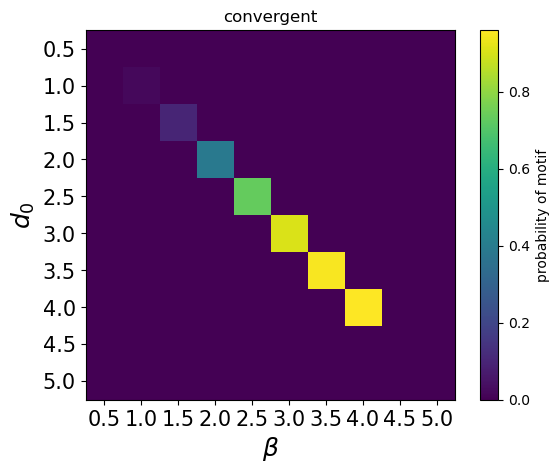

In [105]:
fig, ax = plt.subplots()
pos = plt.imshow(pcons)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif")
ax.set_title('convergent')
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()
# fig.colorbar(pos)

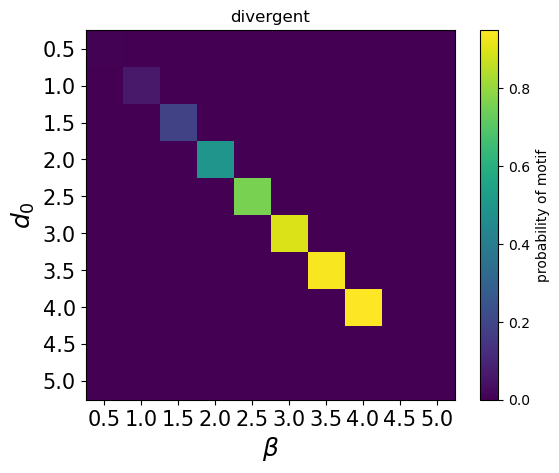

In [106]:
fig, ax = plt.subplots()
pos = plt.imshow(pdivs)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif")
ax.set_title('divergent')
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()

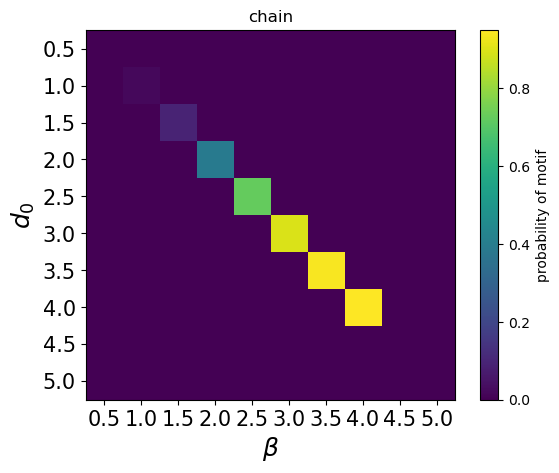

In [107]:
fig, ax = plt.subplots()
pos = plt.imshow(pchs)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif")
ax.set_title('chain')
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()

In [108]:
# betavec, d0vec = np.arange(0.5,5.5,0.5), np.arange(0.5,5.5,0.5)
betavec, d0vec = np.arange(0.5,3.5,0.5), np.arange(0.5,3.5,0.5)
N = 100
pos = np.random.randn(N,3) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
# ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)

pcons = np.zeros((len(betavec),len(d0vec)))
pdivs = np.zeros((len(betavec),len(d0vec)))
pchs = np.zeros((len(betavec),len(d0vec)))

beta_iter = range(len(betavec))
d0_iter = range(len(d0vec))

for i in beta_iter:
    beta = betavec[i]
    print(f'beta = {beta}')
    for j in d0_iter:
        d0 = d0vec[j]
        # print(f'\td0 = {d0}')
        A = np.zeros((N,N))
        for refidx in range(N):
            dists = getDists3D(pos, refidx)
            probs = wax(beta, dists, d0)
            p = np.random.rand()
            conn_idcs = np.argwhere(probs>p)
            for conn_idx in conn_idcs:
                post_idx = conn_idx[0]
                A[refidx,post_idx] = 1
        hostA = nx.from_numpy_array(A, create_using=nx.DiGraph)
        executor = GrandIsoExecutor(graph=hostA)
        con_results = executor.find(con_motif)
        div_results = executor.find(div_motif)
        chain_results = executor.find(chain_motif)
        n_con = len(con_results)
        n_div = len(div_results)
        n_ch = len(chain_results)
        p_con = n_con/N**3
        p_div = n_div/N**3
        p_ch = n_ch/N**3
        pcons[i,j] = p_con
        pdivs[i,j] = p_div
        pchs[i,j] = p_ch
    # print('\n')
print('done')

beta = 0.5
beta = 1.0


KeyboardInterrupt: 

In [ ]:
with open('pcons.npy', 'wb') as f:
    np.save(f, pcons)
    
with open('pdivs.npy', 'wb') as f:
    np.save(f, pdivs)
    
with open('pchs.npy', 'wb') as f:
    np.save(f, pchs)

In [ ]:
fig, ax = plt.subplots()
pos = plt.imshow(pcons)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif",fontsize=15)
ax.set_title('convergent',fontsize=20)
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()

In [ ]:
fig, ax = plt.subplots()
pos = plt.imshow(pdivs)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif",fontsize=15)
ax.set_title('divergent',fontsize=20)
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()

In [ ]:
fig, ax = plt.subplots()
pos = plt.imshow(pchs)
cbar = plt.colorbar(pos)
cbar.set_label("probability of motif",fontsize=15)
ax.set_title('chain',fontsize=20)
ax.set_xticks(np.arange(0,len(betavec),1))
ax.set_xticklabels([str(round(x,2)) for x in betavec])
ax.set_yticks(np.arange(0,len(d0vec),1))
ax.set_yticklabels([str(round(x,2)) for x in d0vec])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel(r'$\beta$',fontsize=18)
ax.set_ylabel(r'$d_0$',fontsize=18)
plt.show()

In [109]:
# put a zero in a vector at a specified position
arr = np.array([1,2,4])
idx = 2
value = 3
arr = np.insert(arr, idx, value)
print(arr)

[1 2 3 4]


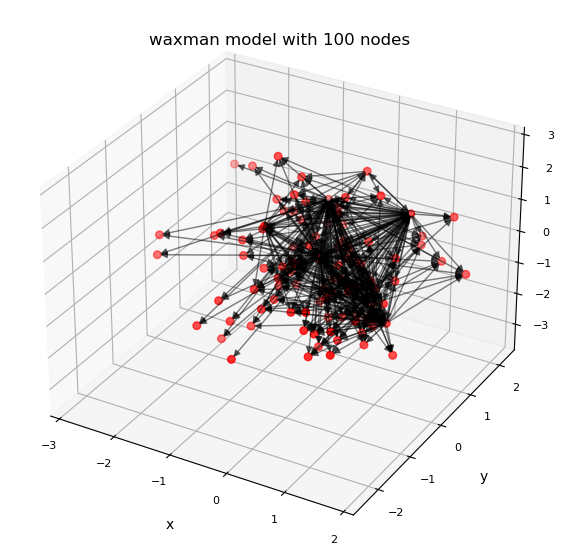

In [110]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

N = 100
pos = np.random.randn(N,3) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)
beta = 1.5
d0 = 1.5
A = np.zeros((N,N))
frac = 0.1 # fraction to take as presynaptic
Npre = int(frac*N)
Npost = N
for refidx in range(Npre):
    dists = getDists3D(pos, refidx)
    probs = wax(beta, dists, d0)
    probs = np.insert(probs, refidx, 0) # no autapses
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    conn_idcs
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        zpre = zpos[refidx]
        zpost= zpos[post_idx]
        dz = zpost - zpre
        ax.arrow3D(xpre, ypre, zpre,
                   dx  , dy  , dz  ,
                   mutation_scale=10,
                   arrowstyle="-|>",
                   ec='black',
                   fc='black',
                   alpha=0.5)
# ax.dist = 13
plt.rcParams['axes.titley'] = 1.
ax.set_title(f'waxman model with {N} nodes')
ax.set_xlabel(r'x',labelpad=10)
ax.tick_params(axis='x',labelsize=8)
ax.set_ylabel(r'y',labelpad=10)
ax.tick_params(axis='y',labelsize=8)
ax.set_zlabel(r'z',labelpad=10)
ax.tick_params(axis='z',labelsize=8)
plt.savefig('3d_spatialNet_wax_rect.png',bbox_inches='tight',dpi=200)
plt.show()
# ax.scatter(xpos, ypos, zpos, s=50, color='red')

In [111]:
A.shape

(100, 100)

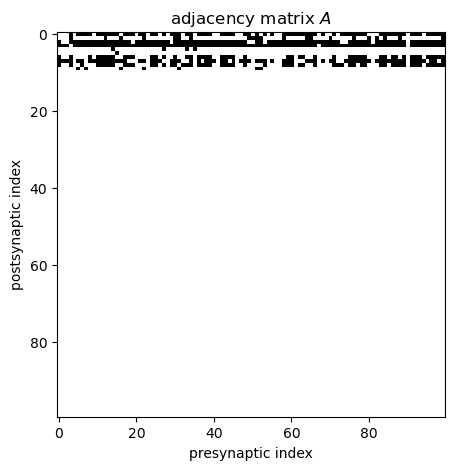

In [112]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(A,aspect="auto",cmap='Greys')
plt.rcParams['axes.titley'] = 1
ax.set_xlabel('presynaptic index')
ax.set_ylabel('postsynaptic index')
ax.set_title(r'adjacency matrix $A$')
plt.savefig('A_3d_spatial_wax_rect.png',bbox_inches='tight',dpi=200)
plt.show()

In [113]:
np.diag(A)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
N_con_total = comb(Npre,2)*(Npost-2) # total number of possible convergent motifs

In [115]:
dist = lambda x, y: sum(abs(a - b) for a, b in zip(x, y))

n = 100
beta = 0.4
alpha = 0.1


for s in range(numseeds):
    G = nx.waxman_graph(n, beta, alpha, metric=dist, seed=s)


In [116]:
pos = np.random.randn(N,3) # random positions of nodes in 3D space
len(pos)

100

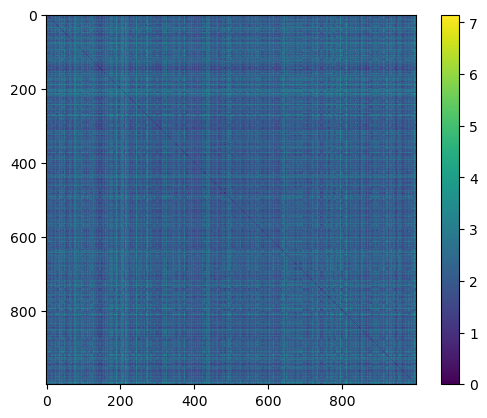

In [147]:
def getDistMatrix(pos):
    N = len(pos)
    D = np.zeros((N,N))
    for refidx in range(len(pos)):
        pos_ref = pos[refidx,:]
        pos_others = pos
        x_ref = pos_ref[0]
        y_ref = pos_ref[1]
        z_ref = pos_ref[2]
        x_others = pos_others[:,0]
        y_others = pos_others[:,1]
        z_others = pos_others[:,2]
        dists = (x_ref - x_others)**2 + (y_ref - y_others)**2 + (z_ref - z_others)**2
        dists = np.sqrt(dists)
        D[refidx,:] = dists
    return D

fig, ax = plt.subplots()
pos = np.random.randn(N,3) # random positions of nodes in 3D space
D = getDistMatrix(pos)
im = plt.imshow(D)
fig.colorbar(im)

In [146]:
np.max(D)

8.001680476165406

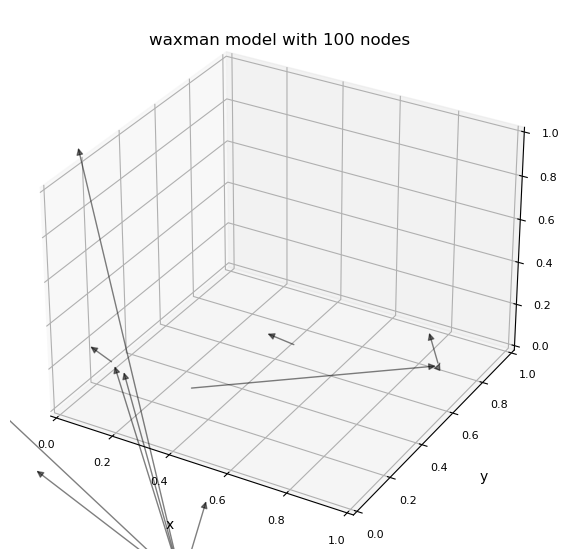

In [120]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

N = 100
# pos = np.random.randn(N,3) # random positions of nodes in 3D space
pos = np.random.uniform(-1,1,size=(N,3)) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
# ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)
beta = 0.4
d0 = 0.1
A = np.zeros((N,N))
for refidx in range(N):
    dists = getDists3D(pos, refidx)
    probs = wax(beta, dists, d0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        zpre = zpos[refidx]
        zpost= zpos[post_idx]
        dz = zpost - zpre
        ax.arrow3D(xpre, ypre, zpre,
                   dx  , dy  , dz  ,
                   mutation_scale=10,
                   arrowstyle="-|>",
                   ec='black',
                   fc='black',
                   alpha=0.5)
        
plt.rcParams['axes.titley'] = 1.
ax.set_title(f'waxman model with {N} nodes')
ax.set_xlabel(r'x',labelpad=10)
ax.tick_params(axis='x',labelsize=8)
ax.set_ylabel(r'y',labelpad=10)
ax.tick_params(axis='y',labelsize=8)
ax.set_zlabel(r'z',labelpad=10)
ax.tick_params(axis='z',labelsize=8)
plt.savefig('3d_spatialNet_wax_uniformPositions.png',bbox_inches='tight',dpi=200)
plt.show()
ax.scatter(xpos, ypos, zpos, s=50, color='red')

In [122]:
print(np.argwhere(A>0))
pre_indcs, post_indcs = np.argwhere(A>0)[:,0], np.argwhere(A>0)[:,1]
print(pre_indcs)
print(post_indcs)

[[30 14]
 [30 15]
 [30 68]
 [30 75]
 [30 77]
 [30 80]
 [45 46]
 [46  0]
 [46 38]
 [67  5]
 [80 23]]
[30 30 30 30 30 30 45 46 46 67 80]
[14 15 68 75 77 80 46  0 38  5 23]


In [123]:
def getConnectedDistances(pos,A):
    N = len(pos)
    D = []
    pre_indcs, post_indcs = np.argwhere(A>0)[:,0], np.argwhere(A>0)[:,1]
    for i, j in zip(pre_indcs, post_indcs):
        pos_pre = pos[i,:]
        pos_post= pos[j,:]
        xpre = pos_pre[0]
        ypre = pos_pre[1]
        zpre = pos_pre[2]
        xpost= pos_post[0]
        ypost= pos_post[1]
        zpost= pos_post[2]
        d = (xpre - xpost)**2 + (ypre - ypost)**2 + (zpre - zpost)**2
        d = np.sqrt(d)
        D.append(d)
    return D

D = getConnectedDistances(pos,A)
print(np.mean(D))
print(d0)

0.7771015134715445
0.1


In [148]:
def generateWaxmanGraph(N, beta, d0, seed):
    np.random.seed(seed)
    pos = 1*np.random.randn(N,3) # random positions of nodes in 3D space
    xpos = pos[:,0]
    ypos = pos[:,1]
    zpos = pos[:,2]
    A = np.zeros((N,N))
    for refidx in range(N):
        dists = getDists3D(pos, refidx)
        probs = wax(beta, dists, d0)
        probs = np.insert(probs, refidx, 0) # no autapses
        p = np.random.rand()
        conn_idcs = np.argwhere(probs>p)
        for conn_idx in conn_idcs:
            post_idx = conn_idx[0]
            A[refidx,post_idx] = 1
    return A, pos


In [149]:
N = 1000
beta = 0.4
seed = 2
d0vec = np.arange(0.1,1.1,0.1)
dvec = []
for d0 in d0vec:
    A, pos = generateWaxmanGraph(N, beta, d0, seed)
    D = getConnectedDistances(pos,A)
    d = np.mean(D)
    dvec.append(d)

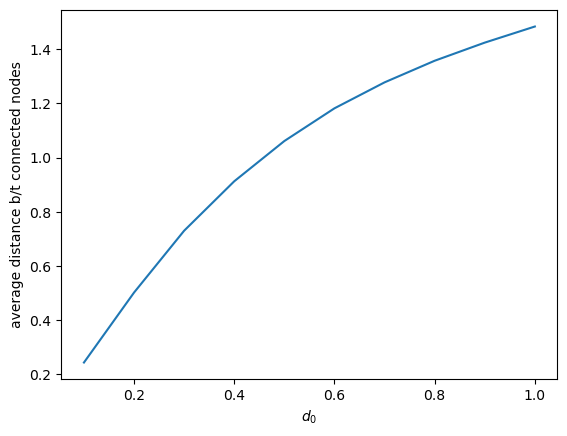

In [150]:
plt.plot(d0vec,dvec)
plt.xlabel(r'$d_0$')
plt.ylabel('average distance b/t connected nodes')
plt.show()

In [134]:
N = 100
beta = 0.4
d0vec = np.arange(0.1,1.1,0.1)

numseeds = 10
dvec_all = []

for seed in range(numseeds):
    dvec = []
    for d0 in d0vec:
        A, pos = generateWaxmanGraph(N, beta, d0, seed)
        D = getConnectedDistances(pos,A)
        d = np.mean(D)
        dvec.append(d)
    if seed == 0:
        dvec_all = np.hstack((dvec_all,dvec))
    else:
        dvec_all = np.vstack((dvec_all,dvec))
dvec_all = np.array(dvec_all)
dvec_means = np.mean(dvec_all,axis=1)
dvec_stds = np.std(dvec_all,axis=1)

In [135]:
dvec_means.shape

(10,)

<ErrorbarContainer object of 3 artists>

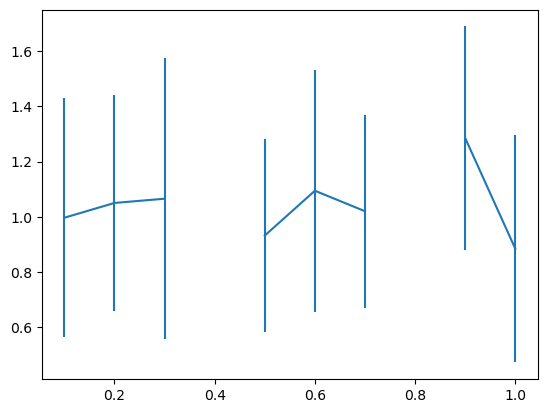

In [136]:
plt.errorbar(d0vec,dvec_means,dvec_stds)

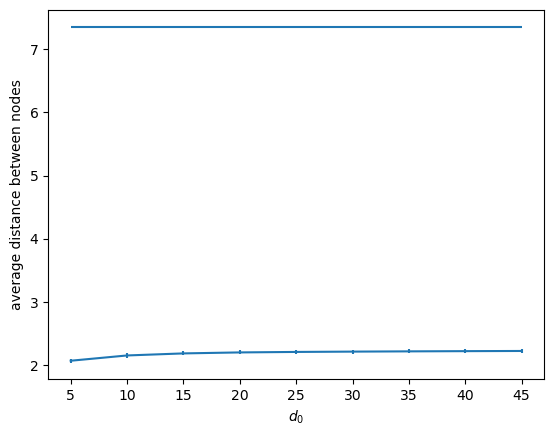

In [152]:
N = 1000
beta = 0.4
# seed = 2
d0vec = np.arange(5,50,5)
numseeds = 10
# all_dvec = np.zeros(len(d0vec))
all_dvec = np.zeros((numseeds,len(d0vec)))
max_dist = []
for seed in range(numseeds):
    dvec = []
    for d0 in d0vec:
        A, pos = generateWaxmanGraph(N, beta, d0, seed)
        D = getConnectedDistances(pos,A)
        Dmatrix = getDistMatrix(pos)
        d = np.mean(D)
        dvec.append(d)
        max_dist.append(np.max(Dmatrix))
    # all_dvec += dvec
    all_dvec[seed,:] = np.array(dvec)
    
# all_dvec_mean = all_dvec/numseeds
all_dvec_mean = np.mean(all_dvec, axis=0)
all_dvec_std = np.std(all_dvec, axis=0)
# plt.hlines(np.sqrt(3),d0vec[0],d0vec[-1])
plt.hlines(np.mean(max_dist),d0vec[0],d0vec[-1])
plt.errorbar(d0vec,all_dvec_mean,all_dvec_std)
plt.xlabel(r'$d_0$')
plt.ylabel('average distance between nodes')
plt.savefig('distVd0.png',bbox_inches='tight',dpi=200)
plt.show()
   